## Contributions
### Cleaning
#### Bavly : Drop extra columns and Make sure that the data is tidy
#### Abdelrahman: Check for outliers and Deal with null (missing) values 
#### Daniel: Check for data types and values and aggregation

### Analysis
#### Bavly: Visualizing a density visualization for kills on the most popular map (mirage) and writing the get_kills Function
#### Abdelrahman: Weapons with highest damage and their visualizations and does paying more equates to winning more
#### Daniel: Average time for the first kill to happen and how many times armor saved players

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
#%matplotlib qt

In [2]:
# Import data
df_map = pd.read_csv("map.csv")
df_grenades = pd.read_csv("grenades.csv")
df_master = pd.read_csv("master.csv")
pd.options.mode.chained_assignment = None  # default='warn'bb

In [3]:
# settings to display all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df_map.head()

,Unnamed: 0,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401


In [5]:
df_grenades.head()

,Unnamed: 0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,NaN,76561198244806730,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,NaN,76561198051040004,NaN,Terrorist,NaN,0,0,False,NaN,NaN,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,NaN,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,NaN,76561198051106390,NaN,CounterTerrorist,NaN,0,0,False,NaN,NaN,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


In [6]:
df_grenades['round'].value_counts()

15    17784
4     16895
7     16649
6     16578
8     16558
10    16489
9     16460
5     16343
14    16285
13    16216
11    16139
12    15977
19    14671
20    14218
21    13764
22    13243
23    12318
3     11575
18    11111
24    11036
25     9879
26     8940
17     8262
2      7847
27     7759
28     6268
29     5067
16     4100
30     3925
1      3742
Name: round, dtype: int64

In [7]:
df_master['round'].value_counts() - df_grenades['round'].value_counts()

1     33719
2     33853
3     28355
4     22065
5     20528
6     19993
7     19378
8     19044
9     19282
10    19736
11    19427
12    19854
13    20176
14    20158
15    18181
16    33572
17    33300
18    27750
19    21662
20    19965
21    18970
22    17396
23    16406
24    15120
25    12968
26    10974
27     9376
28     7569
29     6401
30     4190
Name: round, dtype: int64

In [8]:
round_list = list(df_grenades['round'])
file_list = list(df_grenades['file'])
file = ""
counter = 0;
for (i, item) in enumerate(round_list):
    #print((i, item))
    if (file == file_list[i]):
        counter += 0 if item - round_list[i-1] < 2 else item - round_list[i-1]
        #print("Current counter: ", counter)
        #print("Prev round ", round_list[i-1])
    else:
        file = file_list[i]
        
print("Counter final: ", counter)

Counter final:  491


In [9]:
print("Counter final: ", counter)

Counter final:  491


### Columns to be dropped <br>

<li>"Unnamed: 0": duplicated index</li>
<li>"att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "nade", "winner_team", "nade_land_x","nade_land_y", "round_type": All of these won't be needed to answer our questions</li>

In [10]:
# Drop unused columns - vicrank and attrank???
df_grenades.drop(columns=["Unnamed: 0", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "nade", "winner_team", "nade_land_x","nade_land_y", "round_type"], inplace=True)

In [11]:
df_grenades.head()

,file,map,round,start_seconds,seconds,end_seconds,att_id,vic_id,hp_dmg,arm_dmg,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,76561198244806730,NaN,0,0,CounterTerrorist,13,NaN,-918.1018,-856.1255,NaN,NaN,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,76561198051040004,NaN,0,0,CounterTerrorist,17,NaN,-1310.6070,1145.8650,NaN,NaN,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,76561198147933469,7.656120e+16,36,0,CounterTerrorist,18,18.0,-180.6393,327.6691,-130.1585,304.0313,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,76561198051106390,NaN,0,0,Terrorist,16,NaN,151.3117,2304.8010,NaN,NaN,12400,4700,16.0
4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,76561198051106390,NaN,0,0,Terrorist,16,NaN,-1669.9540,2197.1340,NaN,NaN,12400,4700,16.0


In [12]:
# Check for null values
df_grenades.isna().sum()

file                   0
map                    0
round                  0
start_seconds          0
seconds                0
end_seconds            0
att_id                 0
vic_id            306858
hp_dmg                 0
arm_dmg                0
winner_side            0
att_rank               0
vic_rank          306858
att_pos_x              0
att_pos_y              0
vic_pos_x         306858
vic_pos_y         306858
ct_eq_val              0
t_eq_val               0
avg_match_rank         0
dtype: int64

In [13]:
df_master.head()

,Unnamed: 0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,NaN,Head,USP,Pistol,300,Team 1,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,25,0,False,NaN,RightLeg,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,20,0,False,NaN,LeftLeg,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,17,8,False,NaN,Chest,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,12,7,False,NaN,Chest,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


### Columns to be dropped <br>

<li>"Unnamed: 0": duplicated index</li>
<li>"date", "tick", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "award", "winner_team", "round_type": All of these won't be needed to answer our questions</li>

In [14]:
# Drop unused columns
df_master.drop(columns=["Unnamed: 0", "date", "tick", "att_team", "vic_team", "att_side", "vic_side", "is_bomb_planted", "bomb_site", "hitbox", "award", "winner_team", "round_type"], inplace=True)

In [15]:
df_master.head()

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,1,135.2774,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,2950,3850,16.0
4,003201673717864202280_0171883906.dem,de_dust2,1,135.4024,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,2950,3850,16.0


In [16]:
# Check for null values
df_master.isna().sum()

file              0
map               0
round             0
seconds           0
hp_dmg            0
arm_dmg           0
wp                0
wp_type           0
winner_side       0
att_id            0
att_rank          0
vic_id            0
vic_rank          0
att_pos_x         0
att_pos_y         0
vic_pos_x         0
vic_pos_y         0
ct_eq_val         0
t_eq_val          0
avg_match_rank    0
dtype: int64

### Merging datasets <br>
An outer merge is used since there are columns that are unique to each dataset

In [17]:
# Merge the grenade and master dfs
df = df_master.merge(df_grenades, how="outer")

In [18]:
df.head()

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank,start_seconds,end_seconds
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,7.656120e+16,17.0,1473.847,1351.358,662.170,772.748,2950,3850,16.0,NaN,NaN
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1211.723,1060.813,-1184.006,1153.343,2950,3850,16.0,NaN,NaN
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1153.584,1163.131,-1198.015,1050.423,2950,3850,16.0,NaN,NaN
3,003201673717864202280_0171883906.dem,de_dust2,1,135.2774,17,8,USP,Pistol,CounterTerrorist,76561198223006752,16,7.656120e+16,17.0,-1173.053,1044.365,-1141.785,1190.089,2950,3850,16.0,NaN,NaN
4,003201673717864202280_0171883906.dem,de_dust2,1,135.4024,12,7,Glock,Pistol,CounterTerrorist,76561198051040004,17,7.656120e+16,16.0,-1142.522,1200.967,-1157.690,1050.702,2950,3850,16.0,NaN,NaN


In [19]:
# Checking datatypes
df.dtypes

file               object
map                object
round               int64
seconds           float64
hp_dmg              int64
arm_dmg             int64
wp                 object
wp_type            object
winner_side        object
att_id              int64
att_rank            int64
vic_id            float64
vic_rank          float64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
start_seconds     float64
end_seconds       float64
dtype: object

In [20]:
# Remove all records(nades) with no damage
filt_nade_no_damage = ~(df['hp_dmg'] == 0) & (df['arm_dmg'] == 0)
df = df.loc[filt_nade_no_damage]

In [21]:
#change vic_id to int
df["vic_id"] = df["vic_id"].astype(int)

In [22]:
df.sort_values(['file', 'round', 'start_seconds', 'seconds'], inplace=True)
df.head(10)

,file,map,round,seconds,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank,start_seconds,end_seconds
955468,003201673717864202280_0171883906.dem,de_dust2,1,166.0649,36,0,NaN,NaN,CounterTerrorist,76561198147933469,18,76561198147933472,18.0,-180.63930,327.6691,-130.1585,304.0313,2950,3850,16.0,109.5534,197.6025
0,003201673717864202280_0171883906.dem,de_dust2,1,133.0582,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,76561198123082768,17.0,1473.84700,1351.3580,662.1700,772.7480,2950,3850,16.0,NaN,NaN
1,003201673717864202280_0171883906.dem,de_dust2,1,134.9023,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040000,17.0,-1211.72300,1060.8130,-1184.0060,1153.3430,2950,3850,16.0,NaN,NaN
2,003201673717864202280_0171883906.dem,de_dust2,1,135.0586,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16.0,-1153.58400,1163.1310,-1198.0150,1050.4230,2950,3850,16.0,NaN,NaN
12,003201673717864202280_0171883906.dem,de_dust2,1,141.6849,33,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198212678512,17.0,-774.94770,1473.2860,-496.5128,1388.1080,2950,3850,16.0,NaN,NaN
13,003201673717864202280_0171883906.dem,de_dust2,1,142.0288,29,0,Glock,Pistol,CounterTerrorist,76561198212678511,17,76561198223006752,16.0,-490.68740,1426.0650,-761.1436,1466.1460,2950,3850,16.0,NaN,NaN
14,003201673717864202280_0171883906.dem,de_dust2,1,146.2171,67,0,USP,Pistol,CounterTerrorist,76561198081341202,16,76561198212678512,17.0,-768.21540,1401.0230,-499.7150,1395.2160,2950,3850,16.0,NaN,NaN
18,003201673717864202280_0171883906.dem,de_dust2,1,153.3123,100,0,Glock,Pistol,CounterTerrorist,76561198244806730,13,76561198081341200,16.0,93.01096,403.4241,-391.0740,541.2088,2950,3850,16.0,NaN,NaN
19,003201673717864202280_0171883906.dem,de_dust2,1,166.0336,35,0,P2000,Pistol,CounterTerrorist,76561198051106390,16,76561198147933472,18.0,-484.87440,1315.8170,-180.0215,324.3286,2950,3850,16.0,NaN,NaN
20,003201673717864202280_0171883906.dem,de_dust2,1,166.3149,29,0,P2000,Pistol,CounterTerrorist,76561198051106390,16,76561198147933472,18.0,-470.41930,1297.4150,-175.4643,354.0539,2950,3850,16.0,NaN,NaN


In [23]:
df['start_seconds_filled'] = df['start_seconds'].fillna(method="ffill")
cols = list(df)
cols.insert(3, cols.pop(cols.index('start_seconds')))
cols.insert(5, cols.pop(cols.index('end_seconds')))
cols.insert(6, cols.pop(cols.index('start_seconds_filled')))
df = df.loc[:,cols]


a boxplot for each integer column to show if there is outlier or not

*the fisrt box show that is no outlier in start_seconds','seconds','end_seconds','start_seconds_filled columns*

<AxesSubplot:>

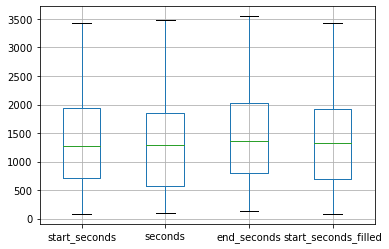

In [24]:
df.boxplot(column=['start_seconds','seconds','end_seconds','start_seconds_filled'])

Note: also there is number of points that is could be show as a oulier is the hp_dmg but it is not why?
    because there is a few number of weapons that could affect 100% of damage

<AxesSubplot:>

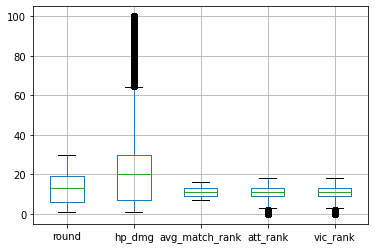

In [25]:
df.boxplot(column=['round','hp_dmg','avg_match_rank','att_rank','vic_rank'])

The below boxplot could show that there is an oulier but we make a box plot for the first two maps because they make 50%  of the most played maps and we will clearify that point 


<AxesSubplot:>

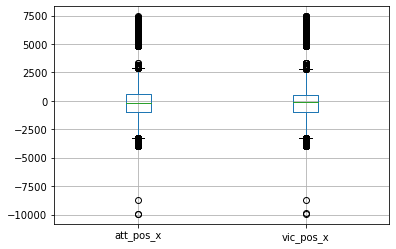

In [26]:
df.boxplot(column=['att_pos_x','vic_pos_x'])

<AxesSubplot:>

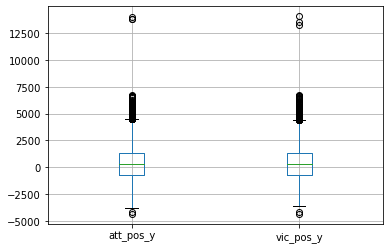

In [27]:
df.boxplot(column=['att_pos_y','vic_pos_y'])

<AxesSubplot:>

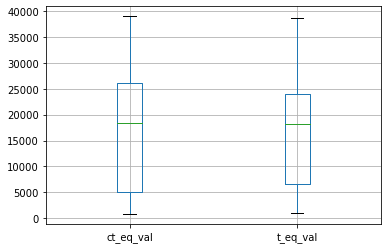

In [28]:
df.boxplot(column=['ct_eq_val','t_eq_val'])

count the value of each weapon to check if there is a outlier or no

In [29]:
df['wp'].value_counts() 

AK47            56262
Incendiary      42545
M4A4            17532
Glock           16350
UMP             16096
USP             16017
P90             13432
M4A1            12556
HE              11694
MP7              9218
SG556            9169
AWP              8954
Mac10            7396
Unknown          5550
FiveSeven        5481
Deagle           5278
Famas            5190
P250             5014
Gallil           4206
MP9              3998
Tec9             3851
P2000            2785
XM1014           2147
AUG              2114
Bizon            2005
CZ               1985
Scout            1544
Swag7            1274
Nova              963
Molotov           684
Smoke             657
Negev             615
Flash             609
Knife             607
DualBarettas      510
SawedOff          302
G3SG1             298
Scar20            284
Zeus              218
M249               73
Decoy              10
Bomb                1
Name: wp, dtype: int64

we dicoverd there is value 1 and it is for bomb row we searched on csgo page about it and we found out bomb is not a weapon it is a mode in the game then we get the index of it

In [30]:
df.index[df['wp']=='Bomb'].tolist()

[891259]

In [31]:
df.loc[df.index[df['wp']=='Bomb']]

,file,map,round,start_seconds,seconds,end_seconds,start_seconds_filled,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
891259,003234338408734130443_0118354570.dem,de_cache,4,NaN,464.273,NaN,394.9071,1,0,Bomb,Equipment,Terrorist,76561198200168377,16,76561198308275472,17.0,-35.29014,2002.041,417.5868,1482.09,22850,25150,16.0


In [32]:
# comment
df.loc[(df['round']==4) & (df['file']=='003234338408734130443_0118354570.dem') &(df['vic_id']==76561198308275472)]


,file,map,round,start_seconds,seconds,end_seconds,start_seconds_filled,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
891254,003234338408734130443_0118354570.dem,de_cache,4,NaN,458.4899,NaN,394.9071,61,0,AWP,Sniper,Terrorist,76561198299299258,17,76561198308275472,17.0,-409.83700,2007.376,509.5721,1706.391,22850,25150,16.0
891259,003234338408734130443_0118354570.dem,de_cache,4,NaN,464.2730,NaN,394.9071,1,0,Bomb,Equipment,Terrorist,76561198200168377,16,76561198308275472,17.0,-35.29014,2002.041,417.5868,1482.090,22850,25150,16.0


get the most top plyed maps

In [33]:
n = 10
df['map'].value_counts()[:n].index.tolist()

['de_mirage',
 'de_dust2',
 'de_cache',
 'de_inferno',
 'de_overpass',
 'de_cbble',
 'de_train',
 'de_nuke',
 'cs_office',
 'cs_agency']

get the percentge of each one and we choosed the first two maps because they make 50% of the played maps on the game

In [34]:
(df['map'].value_counts() / df['map'].value_counts().sum())*100

de_mirage       28.604379
de_dust2        22.979513
de_cache        17.241890
de_inferno      13.443813
de_overpass      5.886959
de_cbble         5.157513
de_train         2.800492
de_nuke          1.058649
cs_office        0.512698
cs_agency        0.370618
de_canals        0.340993
de_thrill        0.324064
de_vertigo       0.298066
cs_assault       0.187727
de_dust          0.184402
cs_italy         0.165660
de_austria       0.149335
cs_insertion     0.099154
de_shipped       0.079807
de_aztec         0.069226
de_blackgold     0.045042
Name: map, dtype: float64

drop the index that have the value of the row of the bomb with index 891259 (commented since it is slow)

In [35]:
#df.drop(index=891259)

get index that containig all de_mirage map and put it in a list to make boxplot for both postion x and y to make sure there is no outlier
Note: we make that because every map have diffrenet corrdeinets

In [36]:
idx = df.index[df['map']=='de_mirage'].tolist()

In [37]:
df2 = df.loc[idx]

In [38]:
df2.head()

,file,map,round,start_seconds,seconds,end_seconds,start_seconds_filled,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
4269,003218553373129179487_1555113029.dem,de_mirage,1,NaN,115.9530,NaN,2140.435,100,0,USP,Pistol,Terrorist,76561198115686363,16,76561198370068224,16.0,-359.5016,389.7257,-468.7209,529.1569,4250,4200,15.0
4271,003218553373129179487_1555113029.dem,de_mirage,1,NaN,116.1405,NaN,2140.435,85,0,Glock,Pistol,Terrorist,76561198355692407,17,76561198115686368,16.0,-650.1707,520.0313,-335.1208,401.2988,4250,4200,15.0
4272,003218553373129179487_1555113029.dem,de_mirage,1,NaN,127.8608,NaN,2140.435,100,0,USP,Pistol,Terrorist,76561198152153688,16,76561198301910016,13.0,-2064.0290,793.1069,-1575.5010,685.9157,4250,4200,15.0
4273,003218553373129179487_1555113029.dem,de_mirage,1,NaN,127.9858,NaN,2140.435,100,0,USP,Pistol,Terrorist,76561198355692407,17,76561198152153696,16.0,-1090.8520,677.1235,-2063.8480,793.9529,4250,4200,15.0
4277,003218553373129179487_1555113029.dem,de_mirage,1,NaN,138.3935,NaN,2140.435,100,0,USP,Pistol,Terrorist,76561198355692407,17,76561198062948336,14.0,-728.0980,458.2229,-1008.2190,347.5916,4250,4200,15.0


make a boxplot for x and we found there is no outlier

<AxesSubplot:>

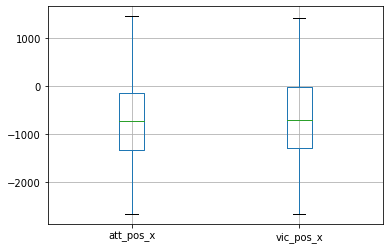

In [39]:
df2.boxplot(column=['att_pos_x','vic_pos_x'])

make a boxplot for y and we found there is no outlier

<AxesSubplot:>

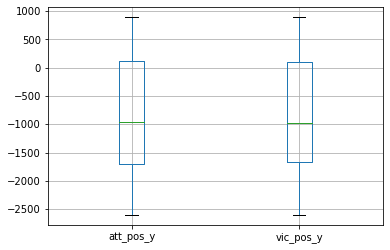

In [40]:
df2.boxplot(column=['att_pos_y','vic_pos_y'])

get index that containig all de_dust2 map and put it in a list to make boxplot for both postion x and y to make sure there is no outlier


In [41]:
idx1 = df.index[df['map']=='de_dust2'].tolist()

In [42]:
df3 = df.loc[idx1]

In [43]:
df3.head()

,file,map,round,start_seconds,seconds,end_seconds,start_seconds_filled,hp_dmg,arm_dmg,wp,wp_type,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,ct_eq_val,t_eq_val,avg_match_rank
955468,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,109.5534,36,0,NaN,NaN,CounterTerrorist,76561198147933469,18,76561198147933472,18.0,-180.6393,327.6691,-130.1585,304.0313,2950,3850,16.0
0,003201673717864202280_0171883906.dem,de_dust2,1,NaN,133.0582,NaN,109.5534,100,0,USP,Pistol,CounterTerrorist,76561198085893650,17,76561198123082768,17.0,1473.8470,1351.3580,662.1700,772.7480,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,1,NaN,134.9023,NaN,109.5534,25,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198051040000,17.0,-1211.7230,1060.8130,-1184.0060,1153.3430,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,1,NaN,135.0586,NaN,109.5534,20,0,Glock,Pistol,CounterTerrorist,76561198051040004,17,76561198223006752,16.0,-1153.5840,1163.1310,-1198.0150,1050.4230,2950,3850,16.0
12,003201673717864202280_0171883906.dem,de_dust2,1,NaN,141.6849,NaN,109.5534,33,0,USP,Pistol,CounterTerrorist,76561198223006752,16,76561198212678512,17.0,-774.9477,1473.2860,-496.5128,1388.1080,2950,3850,16.0


make a boxplot for x and we found there is no outlier


<AxesSubplot:>

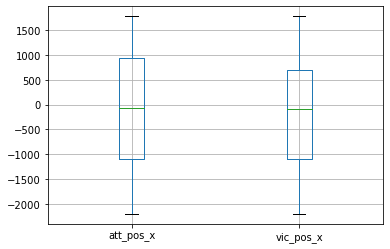

In [44]:
df3.boxplot(column=['att_pos_x','vic_pos_x'])

make a boxplot for y and we found there is some point could be outlier but we get the y corredinate for the map and we get the lowest value for y that is -1550 and we comapare it below to check that is not outlier

<AxesSubplot:>

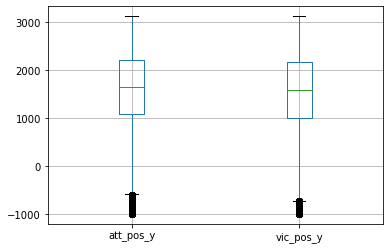

In [45]:
df3.boxplot(column=['att_pos_y','vic_pos_y'])

both the att_pos_y and vic_pos_y is smaller that -1550

In [46]:
print((df3['att_pos_y'] < -1150).sum())
print((df3['vic_pos_y'] < -1150).sum())

0
0


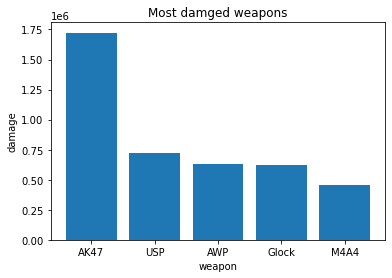

In [47]:
gk = df.groupby('wp')
x=gk.sum().loc[:, ['hp_dmg','arm_dmg']].sum(axis=1).sort_values(ascending=False)[:5]
x_axis = x.index
y_axis = x.values

plt.bar(x_axis,y_axis)
plt.title('Most damged weapons')
plt.xlabel('weapon')
plt.ylabel('damage')
plt.show()

### Function that returns records for kills that happened, and the number of times armor saved players

In [48]:
#function to retrieve all kills, first kills in a round, players saved by armor, and players not saved by armor
def get_kills():
    #sort columns
    df.sort_values(['file', 'round', 'vic_id','seconds'], inplace=True)
    kills = []
    firstkill = []
    saved = 0
    first = False
    unique_files = df["file"].unique()
    for file in unique_files:
        df_match = df[df['file'] == file]
        for round_no in df_match['round'].unique():
            df_round = df_match[df_match['round'] == round_no]
            #first flag set to false every round
            first = False
            for victim in df_round["vic_id"].unique():                
                df_vic = df_round[df_round['vic_id'] == victim]
                hp_value = 100
                armor_value = 0
                for idx, rec in df_vic.iterrows():
                    hp_value -= rec['hp_dmg']
                    armor_value += rec['arm_dmg']
                    if (hp_value <= 0):
                        #victim died
                        if (not first):
                            firstkill.append(idx)
                            first = True
                        kills.append(idx)
                        break
                if hp_value - armor_value <= 0:
                    #armor saved this player
                    saved += 1
    return (kills, firstkill, saved)

In [49]:
kills, firstkill, saved = get_kills()

### Answering the question related to the density of kills on the most frequent maps, mirage

In [50]:
df_map['total_x'] = df_map['EndX'] - df_map['StartX']
df_map['total_y'] = df_map['EndY'] - df_map['StartY']

In [51]:
df_map

,Unnamed: 0,EndX,EndY,ResX,ResY,StartX,StartY,total_x,total_y
0,de_cache,3752,3187,1024,1024,-2031,-2240,5783,5427
1,de_cbble,2282,3032,1024,1024,-3819,-3073,6101,6105
2,de_dust2,2127,3455,1024,1024,-2486,-1150,4613,4605
3,de_inferno,2797,3800,1024,1024,-1960,-1062,4757,4862
4,de_mirage,1912,1682,1024,1024,-3217,-3401,5129,5083
5,de_overpass,503,1740,1024,1024,-4820,-3591,5323,5331
6,de_train,2262,2447,1024,1024,-2436,-2469,4698,4916


In [52]:
from PIL import Image

total_x = 5129
neg_x = 3217
total_y = 5083
neg_y = 3401
mapName="de_mirage"
FILENAME = mapName+".png"

img = Image.open(FILENAME)


img = img.resize((total_x, total_y), Image.ANTIALIAS) #total_x and total_y

In [55]:
df_kills = df.loc[kills]
filt_mirage = df_kills['map'] == mapName
df_kills = df_kills.loc[:, ['vic_pos_x','vic_pos_y','att_pos_x','att_pos_y']]
df = df_kills.loc[filt_mirage]

In [56]:
df['att_pos_x'] = (df['att_pos_x'] + neg_x).astype(int) # Negative X
df['vic_pos_x'] = (df['vic_pos_x'] + neg_x).astype(int) # Negative X
df['att_pos_y'] = (df['att_pos_y'] + neg_y).astype(int) # Negative Y
df['vic_pos_y'] = (df['vic_pos_y'] + neg_y).astype(int) # Negative Y

In [57]:
df['att_pos_x'] = df['att_pos_x'] - df['att_pos_x'] % -10
df['vic_pos_x'] = df['vic_pos_x'] - df['vic_pos_x'] % -10
df['att_pos_y'] = df['att_pos_y'] - df['att_pos_y'] % -10
df['vic_pos_y'] = df['vic_pos_y'] - df['vic_pos_y'] % -10

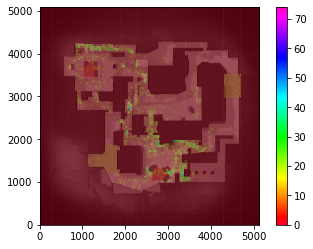

In [58]:
x = df['vic_pos_y'] #Swap x and y
y = df['vic_pos_x'] #Swap x and y
coorx = total_x #total_x 
coory = total_y #total_y
binsize = 40 #trial and error

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(0,coorx,binsize),np.arange(0,coory,binsize)])


extent_img = 0, total_x, 0, total_y

extent_heat = min(x), max(x), min(y), max(y)

fig, ax = plt.subplots()

plt.imshow(heatmap, origin='lower', extent=extent_img, interpolation="none", alpha=1, cmap=cm.gist_rainbow);

ax.imshow(img, extent=extent_img, alpha=0.7);

plt.colorbar();